## Experiments: Comparing RSAST with other methods

In [14]:
#configure directory to import sast libraries
import sys 
import os 
#add sast library path
file_path = os.path.dirname(os.getcwd())+"/sast"

#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.path.dirname(os.getcwd())+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

#add cd_diagram library path
file_path = os.path.dirname(os.getcwd())+"\cd_diagram"

#file_path = r"C:\Users\Public\random_sast\cd_diagram"
sys.path.append(file_path)


file_path = os.path.dirname(os.getcwd())+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

sys.path

['c:\\Users\\Public\\random_sast\\ExperimentationRSAST',
 'c:\\ProgramData\\Anaconda3\\python39.zip',
 'c:\\ProgramData\\Anaconda3\\DLLs',
 'c:\\ProgramData\\Anaconda3\\lib',
 'c:\\ProgramData\\Anaconda3',
 '',
 'C:\\Users\\Nicolas R\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Nicolas R\\.ipython',
 'C:\\Users\\Nicolas R/random_sast/sast',
 'C:\\Users\\Nicolas R/random_sast/cd_diagram',
 'c:\\Users\\Public\\random_sast/sast',
 'c:\\Users\\Public\\random_sast\\sast',
 'c:\\Users\\Public\\random_sast\\cd_diagram',
 'c:\\Users\\Public\\random_sast/cd_diagram',
 'c:\\Users\\Public\\random_sast/sast',
 'c:\\Users\\Public\\random_sast\\sast',
 'c:\\Users\\Public\\random

In [15]:
from sast import *
from sktime.datasets import load_UCR_UEA_dataset, tsc_dataset_names
from sktime.classification.kernel_based import RocketClassifier
import time
import pandas as pd
from sktime.transformations.panel.shapelet_transform import ShapeletTransform
import matplotlib.pyplot as plt
import os

hyperparameter='ACF&PACF: n_random_points=100 nb_inst_per_class=50'

### Reading Datasets

In [16]:
# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsByClassifier'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        # Append the dataframe to the list
        df['filename']=filename
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_other_methods = pd.concat(dfs, ignore_index=True)
df_other_methods=df_other_methods[['filename','folds:','0']]
df_other_methods['method']=df_other_methods['filename'].str.split('_').str[0]
df_other_methods
df_other_methods=df_other_methods.rename(columns={'folds:':'dataset','0':'score'})
df_other_methods=df_other_methods[['dataset','score','method']]



In [17]:
df_other_methods['method'].unique()

array(['BOSS', 'Catch22', 'cBOSS', 'HIVE-COTEv1', 'InceptionTime',
       'ProximityForest', 'ResNet', 'RISE', 'ROCKET', 'S-BOSS', 'SAST',
       'STC', 'TS-CHIEF', 'TSF', 'WEASEL'], dtype=object)

In [18]:
# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsRsast'
#directory = os.getcwd()+'/results_accuracy_per_ds'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.startswith("df_overall_tunning") and filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        df['rpoint']=df['rpoint'].astype(str)
        df['nb_per_class']=df['nb_per_class'].astype(str)
        df['rpoint']=df['rpoint'].replace("(lenthg ts)//2","half_len")
        df['nb_per_class']=df['nb_per_class'].replace("(max instances per class)//2","half_instance")
        df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
        df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")        
        # Append the dataframe to the list
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_result = pd.concat(dfs, ignore_index=True)
df_result.columns

C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_12372\325064895.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_12372\325064895.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_12372\325064895.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_12372\325064895.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.repl

Index(['Unnamed: 0', 'accuracy', 'time', 'cweights_time', 'fsubsequence_time',
       'tdataset_time', 'tclassifier_time', 'dataset_name', 'classifier_name',
       'rpoint', 'nb_per_class', 'method', 'len_method'],
      dtype='object')

In [19]:
df_result=df_result[['accuracy','dataset_name','classifier_name','time']]

df_result=df_result[df_result["classifier_name"]==hyperparameter]
df_result.dataset_name.unique()


array(['Chinatown', 'Coffee', 'DistalPhalanxOutlineAgeGroup',
       'DistalPhalanxOutlineCorrect', 'GunPoint', 'ItalyPowerDemand',
       'ShapeletSim', 'SmoothSubspace', 'SonyAIBORobotSurface2',
       'SyntheticControl'], dtype=object)

In [20]:

df_other_methods=df_other_methods.rename(columns={"dataset":"dataset_name","score":"accuracy","method":"classifier_name"})
df_other_methods = df_other_methods[df_other_methods['dataset_name'].isin(df_result.dataset_name.values)]
df_other_methods.columns

Index(['dataset_name', 'accuracy', 'classifier_name'], dtype='object')

In [21]:
# concatenate the two dataframes
concatenated_df = pd.concat([df_other_methods, df_result])

# reset the index of the concatenated dataframe
concatenated_df = concatenated_df.reset_index(drop=True)


In [22]:
concatenated_df['classifier_name'].unique()

array(['BOSS', 'Catch22', 'cBOSS', 'HIVE-COTEv1', 'InceptionTime',
       'ProximityForest', 'ResNet', 'RISE', 'ROCKET', 'S-BOSS', 'SAST',
       'STC', 'TS-CHIEF', 'TSF', 'WEASEL',
       'ACF&PACF: n_random_points=100 nb_inst_per_class=50'], dtype=object)

### Overall analysis

#### Accuracy: RSAST vs Other methods

In [23]:
# create a pivot table with the mean of score by hyperparameter
score_by_method=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='mean')



In [24]:
t_score_by_method=score_by_method.transpose()
t_score_by_method
t_score_by_method[[hyperparameter,"STC","ROCKET"]]


classifier_name,ACF&PACF: n_random_points=100 nb_inst_per_class=50,STC,ROCKET
dataset_name,,,
Chinatown,0.982507,0.967930,0.982507
Coffee,1.000000,1.000000,1.000000
DistalPhalanxOutlineAgeGroup,0.721823,0.769784,0.748201
DistalPhalanxOutlineCorrect,0.731884,0.771739,0.771739
GunPoint,0.980000,0.993333,1.000000
ItalyPowerDemand,0.949466,0.955296,0.968902
ShapeletSim,0.883333,1.000000,1.000000
SmoothSubspace,0.942222,0.933333,0.980000
SonyAIBORobotSurface2,0.915005,0.943337,0.916055


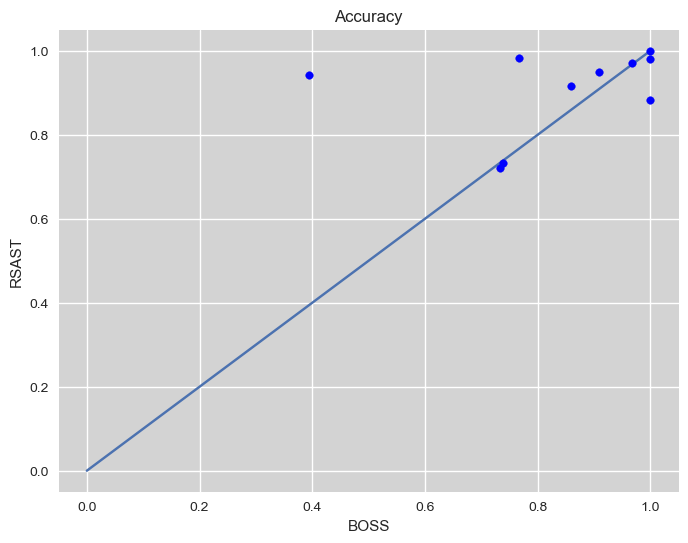

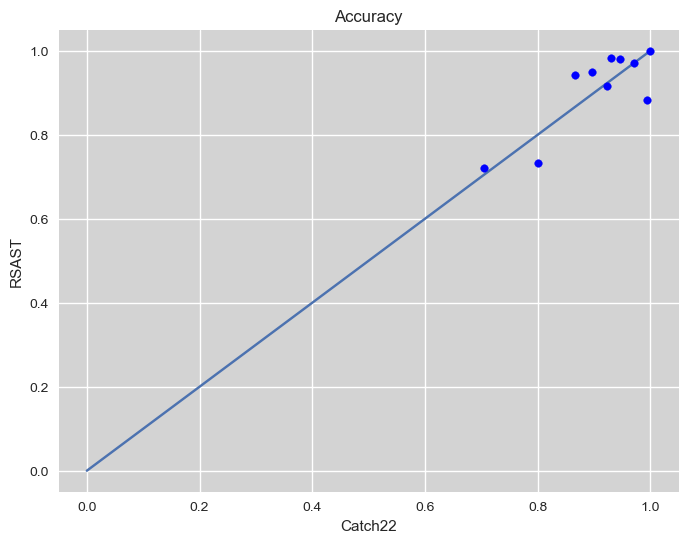

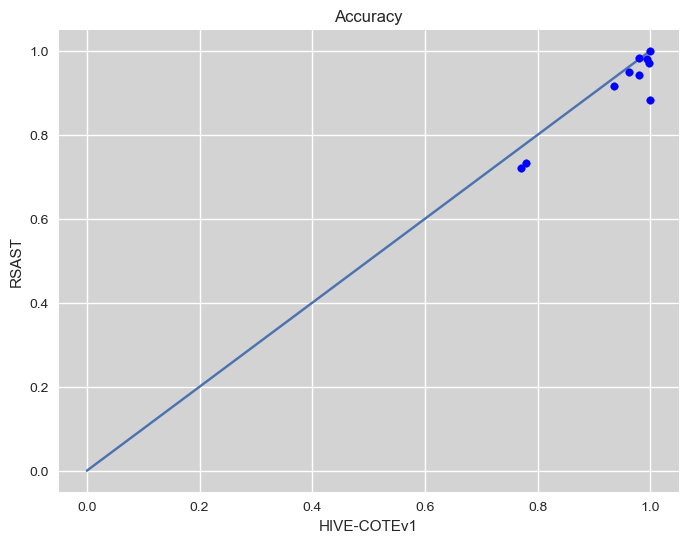

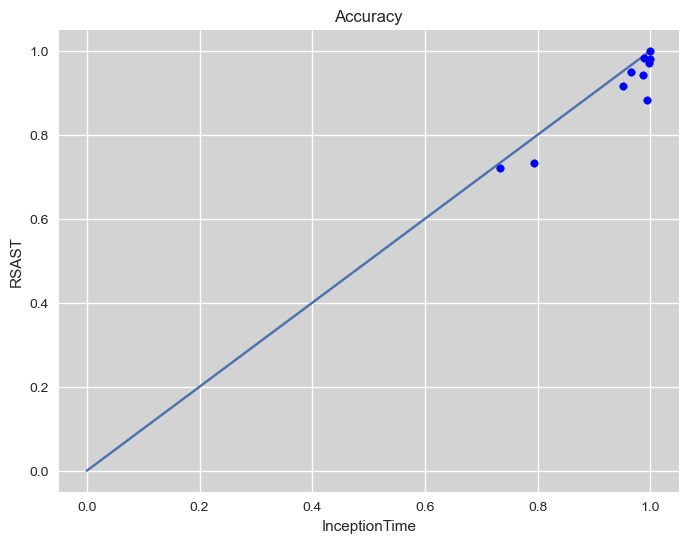

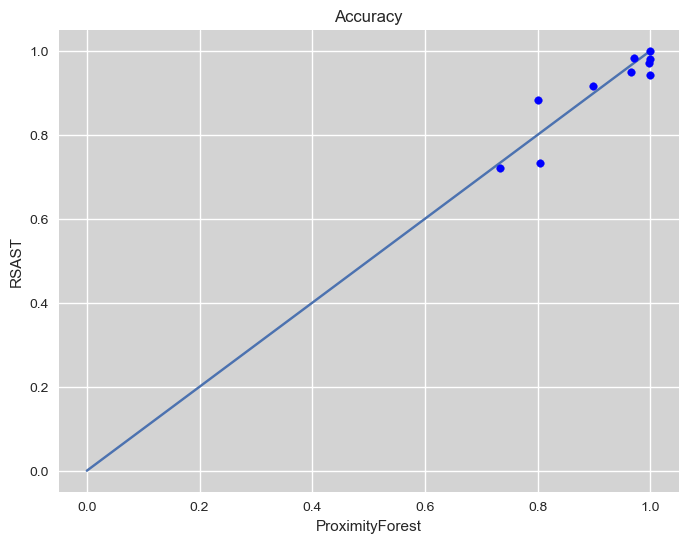

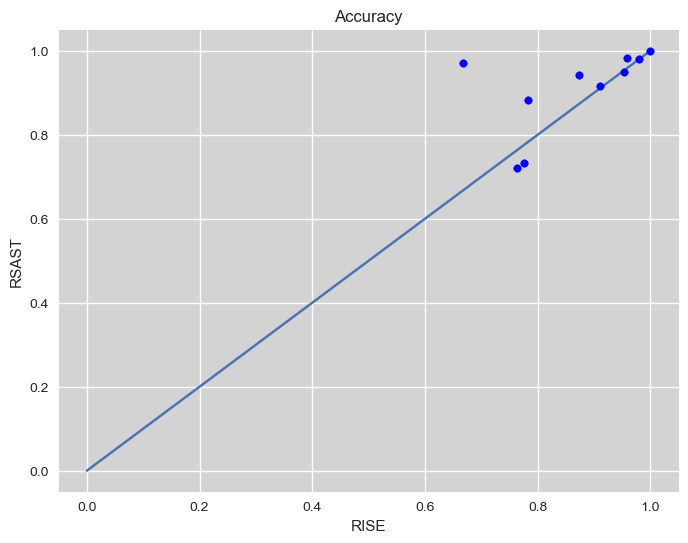

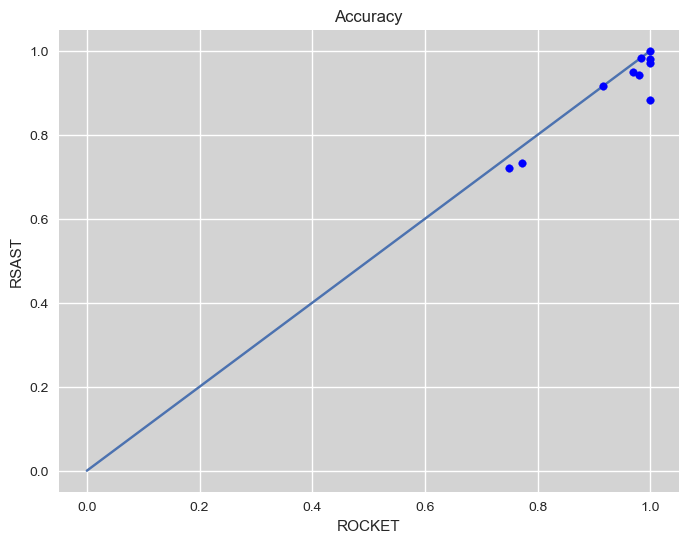

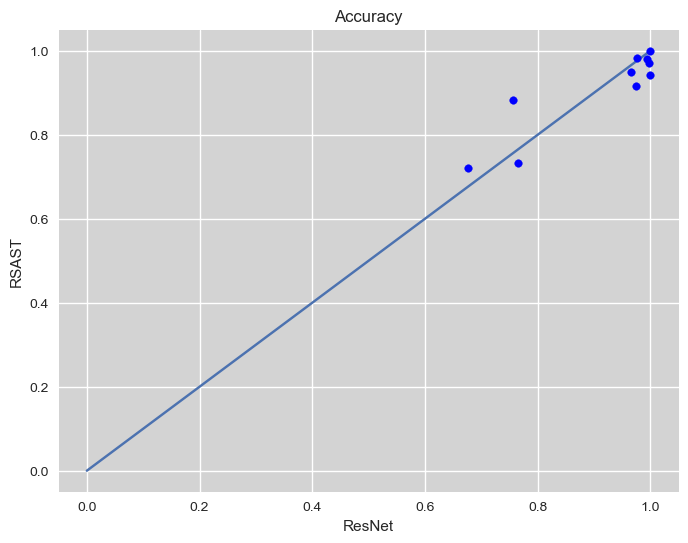

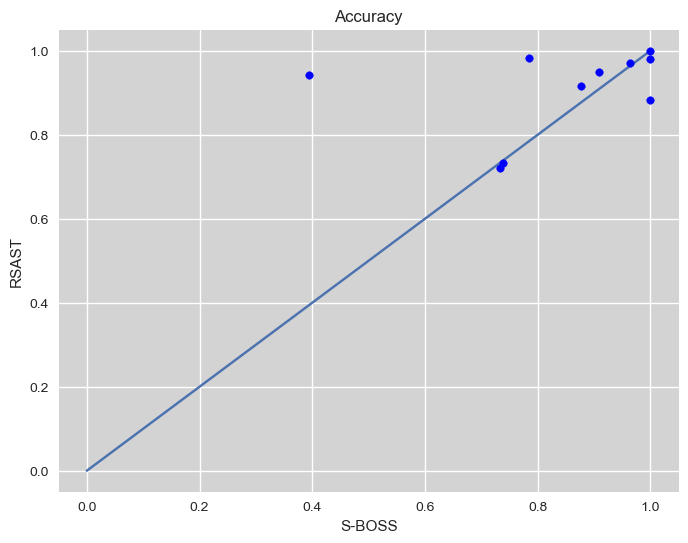

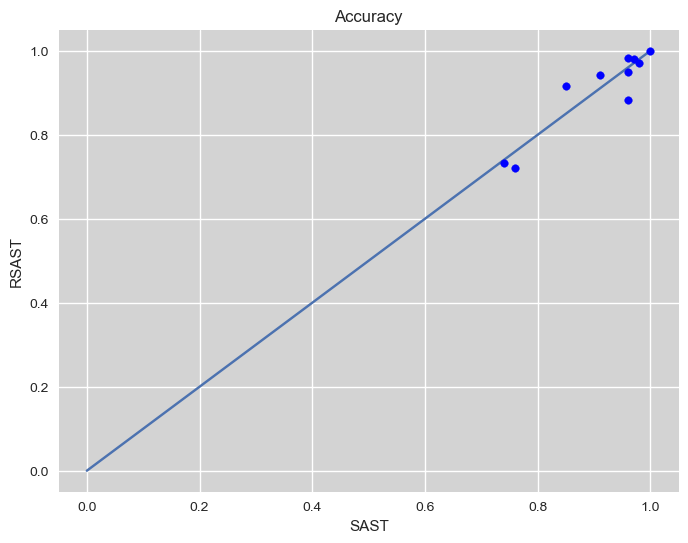

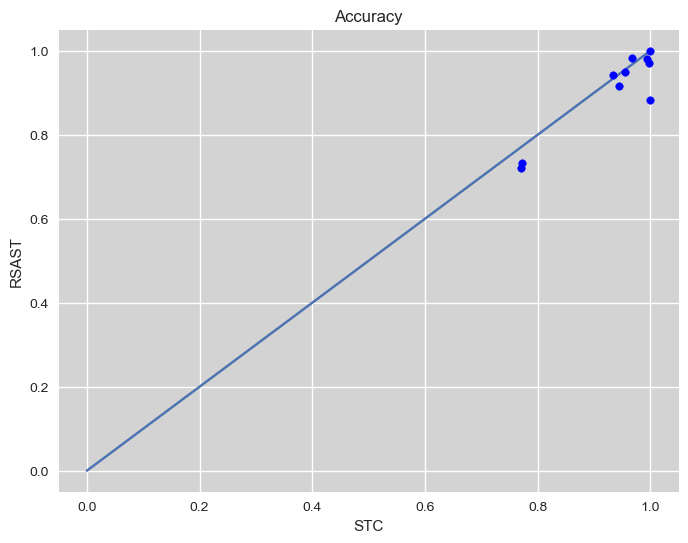

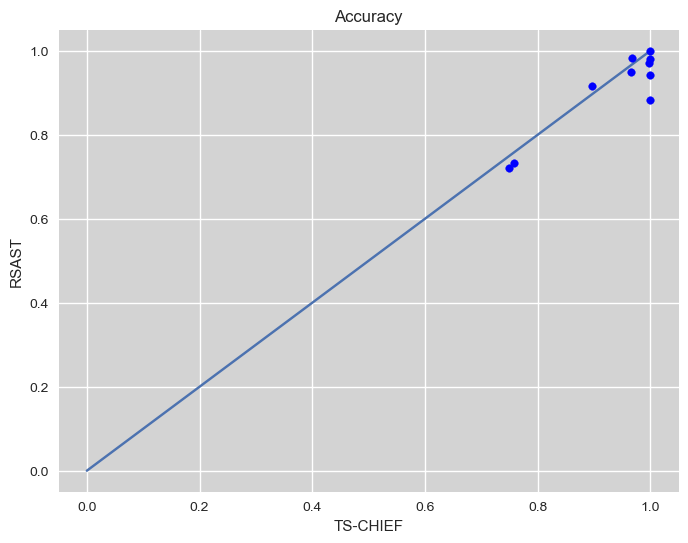

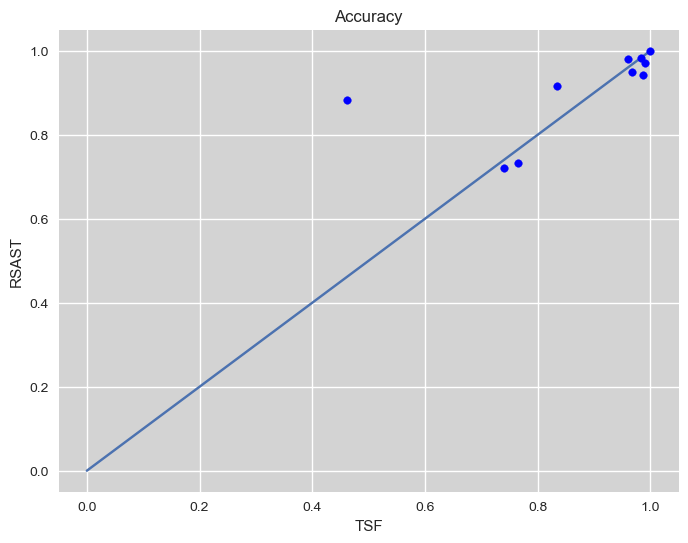

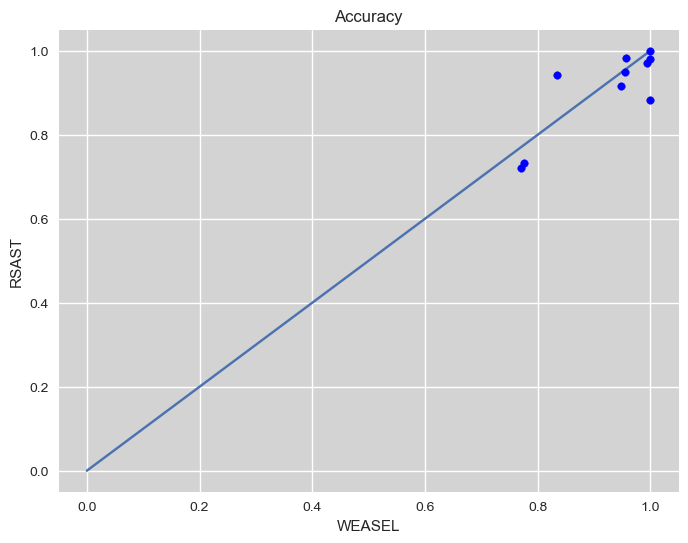

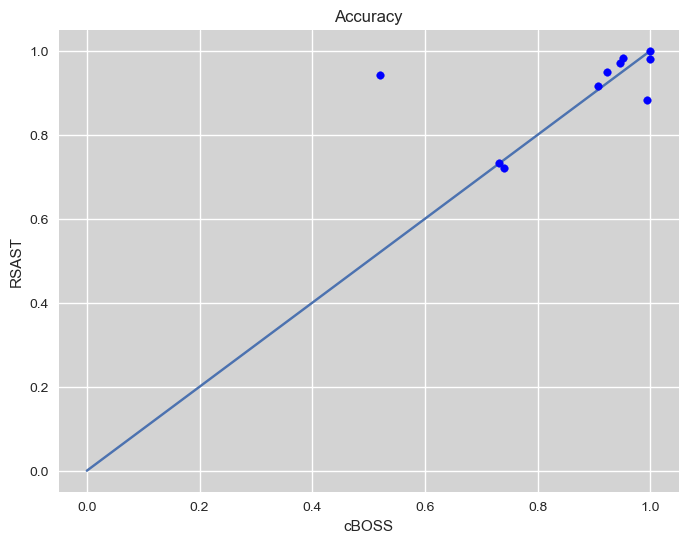

In [25]:
for method in t_score_by_method.columns.drop(hyperparameter):
    y=t_score_by_method[hyperparameter]
    x=t_score_by_method[method]

    # set the style of the plot
    plt.style.use('seaborn')

    # create the plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # plot the line
    ax.plot([0,1], [0,1])

    # plot the points
    ax.scatter(x, y, color='blue', edgecolor='blue', s=30, zorder=10)

    # add labels and title
    ax.set_ylabel('RSAST')
    ax.set_xlabel(method)
    ax.set_title('Accuracy')


    # set the background color
    ax.set_facecolor('lightgrey')
    plt.savefig('images_one_vs_one_comparison/RSASTvs'+method+'.png')


In [26]:
# create a pivot table with the mean of time by hyperparameter
time_per_method=pd.pivot_table(df_result, values='time', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')/60
time_per_method

classifier_name,ACF&PACF: n_random_points=100 nb_inst_per_class=50
dataset_name,
Chinatown,0.002868
Coffee,5.557550
DistalPhalanxOutlineAgeGroup,13.115985
DistalPhalanxOutlineCorrect,15.653940
GunPoint,4.068692
ItalyPowerDemand,0.027704
ShapeletSim,5.409422
SmoothSubspace,0.026104
SonyAIBORobotSurface2,0.086087


In [27]:
# create a pivot table with the variation of score by hyperparameter
pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='var')


dataset_name,Chinatown,DistalPhalanxOutlineAgeGroup,DistalPhalanxOutlineCorrect,GunPoint,ItalyPowerDemand,ShapeletSim,SmoothSubspace,SonyAIBORobotSurface2
classifier_name,,,,,,,,
ACF&PACF: n_random_points=100 nb_inst_per_class=50,0.0,0.000017,0.000486,0.0,0.0,0.0,0.000104,0.0


#### Generate CD Diagram comparison

In [28]:

from cd_function import *
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
draw_cd_diagram(df_perf, labels=True, title="Overall Comparison Other Methods", name_file='images_cd_diagram/cd-diagram_overall_comparison_other_method.png')


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [29]:
df_perf["classifier_name"].unique()

array(['ACF&PACF: n_random_points=100 nb_inst_per_class=50', 'BOSS',
       'Catch22', 'HIVE-COTEv1', 'InceptionTime', 'ProximityForest',
       'RISE', 'ROCKET', 'ResNet', 'S-BOSS', 'SAST', 'STC', 'TS-CHIEF',
       'TSF', 'WEASEL', 'cBOSS'], dtype=object)

In [30]:
_, average_ranks, _ = wilcoxon_holm(df_perf=df_perf)
min_rank= min(average_ranks)
average_ranks=pd.DataFrame(average_ranks)
average_ranks

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,0
BOSS,11.50
S-BOSS,11.40
cBOSS,11.10
Catch22,11.00
ACF&PACF: n_random_points=100 nb_inst_per_class=50,10.50
SAST,10.35
RISE,10.25
TSF,9.20
ResNet,7.80
WEASEL,7.00
